In [2]:
import pyedflib
import numpy as np
import os
import matplotlib.pyplot as plt
%run scripts/readEDF.py

In [2]:
data_folder = '/'.join(os.getcwd().split('/')[:-1]) + '/ANES212_data/chb01/'
data_file = 'chb01_03.edf'
print data_folder + data_file
f = pyedflib.EdfReader(data_folder + data_file)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

/Users/christine/Documents/GitHub/ANES212_data/chb01/chb01_18.edf


In [56]:
df = read_single_edf('chb01_03.edf')

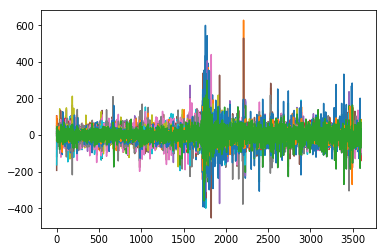

In [4]:


for i in range(sigbufs.shape[0]):
    plt.plot(sigbufs[i,:][::256])
plt.show()

In [69]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = len(a)
print(b)
y = sigbufs[:,::256]
print(y.shape)

3
(23, 3600)


/Users/christine/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


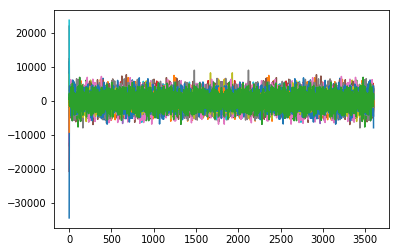

In [18]:
from scipy.fftpack import fft
y = sigbufs[:,::256]
# Number of sample points
N = len(y[0])
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
for i in range(y.shape[0]):
    yf[i,:] = fft(y[i,:])
    plt.plot(yf[i,:])
plt.show()
#xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#import matplotlib.pyplot as plt
#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#plt.grid()
#plt.show()

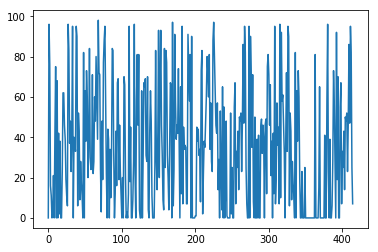

In [73]:
from scipy.fftpack import fft
y = sigbufs[:,::256]
# Number of sample points
N = len(y[0])
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
maxf=0
for i in range(y.shape[0]):
    for j in range(0,N/200):
        yf = fft(y[i,j*200:j*200+200-1])
        val = np.argmax(np.abs(yf))
        maxf = np.append(maxf,val)
plt.plot(maxf)
plt.show()

/Users/christine/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/christine/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


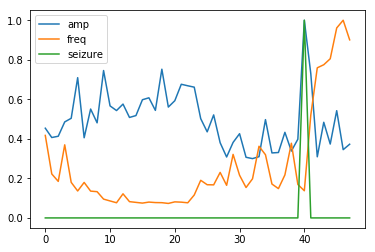

In [25]:
from scipy.fftpack import fft
y = df.as_matrix()[:,3:].T
seizure=df['seizure'].as_matrix()
# Number of sample points
N = len(y[0])
# sample spacing
#T = 1.0 / 800.0
#x = np.linspace(0.0, N*T, N)
maxmag=[]
minmag=[]
avgf=[]
w=256*75 #size of window
for i in range(0,N/w):
    maxi=[]
    mini=[]
    maxf=[]
    for j in range(y.shape[0]):
        maxi.append(max(y[j,i*w:i*w+w]))
        mini.append(min(y[j,i*w:i*w+w]))
        yf = fft(y[j,i*w:i*w+w])
        val = np.argmax(np.abs(yf))
        maxf.append(val)
    maxmag.append(max(maxi))
    minmag.append(min(mini))
    avgf.append(np.mean(maxf))
    amp=np.array(maxmag)-np.array(minmag)
plt.plot(amp/max(amp),label='amp')
plt.plot(avgf/max(avgf),label='freq')
plt.plot(seizure[::w],label='seizure')
plt.legend()
plt.show()

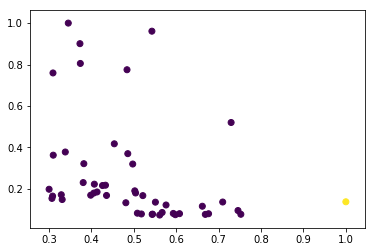

In [26]:
plt.scatter(amp/max(amp),avgf/max(avgf),c=seizure[::w])

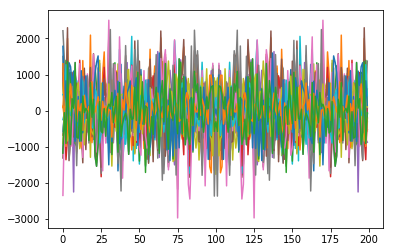

In [15]:
from scipy.fftpack import fft
for i in range(y.shape[0]):
    yf = fft(y[i,2900:3100])
    yf2 = fft(y[i,1400:1600])
    plt.plot(yf2-yf)
plt.show()

In [20]:
a = 1
a=np.append(a,5)
print(a)
print(len(a))
print(N)

[1 5]
2
595200


In [ ]:
df.as_matrix() #convert data frame to matrix
df['seizure'] #get one 
df.iloc[0,0] #get a value in the data frame
df.loc[df['seizure']==1] #all the rows/times with a seizure

/Users/christine/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/christine/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


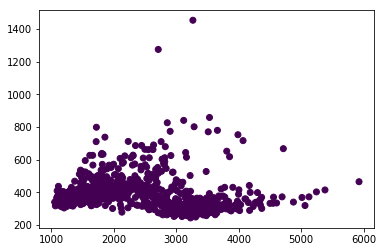

In [92]:
def lowvshigh_energy(df)
    from scipy.fftpack import fft
    df = read_single_edf('chb01_14.edf')
    y = df.as_matrix()[:,3:].T
    seizure=df['seizure'].as_matrix()
    # Number of sample points
    N = len(y[0])
    # sample spacing in seconds
    T = 1.0/256 
    # Energy
    lowE=[]
    highE=[]
    w=256*5 #size of window
    for i in range(0,N/w):
        low=[]
        high=[]
        for j in range(y.shape[0]):
            signal=y[j,i*w:i*w+w]
            yf = np.abs(fft(signal))
            # frequency 0-128 Hz with w/2 points in total
            # interested in 0-16Hz and 14-36Hz
            l=np.mean(yf[0:np.floor(16.0/128*(w//2)).astype(int)])
            h=np.mean(yf[np.floor(14.0/128*(w//2)).astype(int):np.floor(36.0/128*(w//2)).astype(int)])
            low.append(l)
            high.append(h)
        lowE.append(np.mean(low))
        highE.append(np.mean(high))
    plt.scatter(lowE,highE,c=seizure[::w])
    plt.show()

/Users/christine/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/christine/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


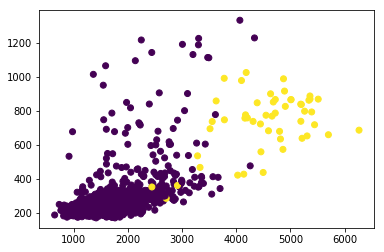

In [10]:
from scipy.fftpack import fft
df = read_single_edf('chb01_26.edf')
y = df.as_matrix()[:,3:].T
seizure=df['seizure'].as_matrix()
# Number of sample points
N = len(y[0])
# sample spacing in seconds
T = 1.0/256 
# Energy
lowE=[]
highE=[]
w=256*2 #size of window
for i in range(0,N/w):
    low=[]
    high=[]
    for j in range(y.shape[0]):
        signal=y[j,i*w:i*w+w]
        yf = np.abs(fft(signal))
        # frequency 0-128 Hz with w/2 points in total
        # interested in 0-16Hz and 14-36Hz
        l=np.mean(yf[0:np.floor(16.0/128*(w//2)).astype(int)])
        h=np.mean(yf[np.floor(14.0/128*(w//2)).astype(int):np.floor(36.0/128*(w//2)).astype(int)])
        low.append(l)
        high.append(h)
    lowE.append(np.mean(low))
    highE.append(np.mean(high))
plt.scatter(lowE,highE,c=seizure[::w][:-1])
plt.show()

In [36]:
c=np.asarray(seizure[::w])
c.reshape((720,1))
c.shape
vec.shape

(720, 2)

In [39]:
# Support vector machines
from sklearn import svm
vec = [lowE, highE]
vec = np.asarray(x)
c=np.asarray(seizure[::w])
clf = svm.SVC()
clf.fit(vec, c) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
vec = [lowE, highE]
vec = np.asarray(x)

In [42]:
pred = clf.predict(vec)

In [43]:
from sklearn.metrics import confusion_matrix
c=np.asarray(seizure[::w])
confusion_matrix(c, pred)

array([[701,   0],
       [ 11,   8]])